In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Import citipy
from citipy import citipy

# set up output file
output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)



In [2]:
# set lists for latitudes and longitudes and cities
lat_lngs = []
cities = []

# random list of latitudes and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#     append unique cities to city list
    if city not in cities:
        cities.append(city)
        
len(cities)

625

In [5]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
# city = "London"
# cities = ["London", "Paris", "Boston"]
df_cities = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


for city in cities:
    print(f"Retrieving results for Index (index): {city}.")
    query_url = base_url + "appid=" + weather_api_key + "&units=imperial" + "&q="+ city
    response = requests.get(query_url).json()
    try:
        
        df_cities.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
    except:
        print("city not found")
    
    





Retrieving results for Index : cidreira.
Retrieving results for Index : vila.
Retrieving results for Index : silale.
Retrieving results for Index : susangerd.
Retrieving results for Index : dikson.
Retrieving results for Index : husavik.
Retrieving results for Index : sompeta.
Retrieving results for Index : qaanaaq.
Retrieving results for Index : namwala.
Retrieving results for Index : hilo.
Retrieving results for Index : avarua.
Retrieving results for Index : new norfolk.
Retrieving results for Index : torbay.
Retrieving results for Index : cape town.
Retrieving results for Index : busselton.
Retrieving results for Index : kibaya.
Retrieving results for Index : irtyshskiy.
Retrieving results for Index : port elizabeth.
Retrieving results for Index : albany.
Retrieving results for Index : carnarvon.
Retrieving results for Index : bredasdorp.
Retrieving results for Index : ostrovnoy.
Retrieving results for Index : ushuaia.
Retrieving results for Index : port alfred.
Retrieving results f

Retrieving results for Index : ahuimanu.
Retrieving results for Index : severo-kurilsk.
Retrieving results for Index : awjilah.
Retrieving results for Index : kandi.
Retrieving results for Index : mangaratiba.
Retrieving results for Index : gravdal.
Retrieving results for Index : roma.
Retrieving results for Index : beloha.
Retrieving results for Index : cuamba.
Retrieving results for Index : itoman.
Retrieving results for Index : aklavik.
Retrieving results for Index : maniitsoq.
Retrieving results for Index : andenes.
Retrieving results for Index : mar del plata.
Retrieving results for Index : kokopo.
Retrieving results for Index : casablanca.
Retrieving results for Index : alofi.
Retrieving results for Index : zhezkazgan.
Retrieving results for Index : tubmanburg.
Retrieving results for Index : rochefort.
Retrieving results for Index : sao joao de pirabas.
Retrieving results for Index : prince rupert.
Retrieving results for Index : coquimbo.
Retrieving results for Index : avera.
Ret

Retrieving results for Index : senno.
Retrieving results for Index : san cristobal.
Retrieving results for Index : santa maria da vitoria.
Retrieving results for Index : monaragala.
Retrieving results for Index : sun city west.
Retrieving results for Index : kavant.
city not found
Retrieving results for Index : saint combs.
city not found
Retrieving results for Index : beltinci.
Retrieving results for Index : iqaluit.
Retrieving results for Index : wanning.
Retrieving results for Index : chapais.
Retrieving results for Index : camacupa.
Retrieving results for Index : bud.
Retrieving results for Index : alausi.
Retrieving results for Index : nueva gorgona.
Retrieving results for Index : skjervoy.
Retrieving results for Index : asau.
Retrieving results for Index : saint-joseph.
Retrieving results for Index : bababe.
city not found
Retrieving results for Index : simao.
Retrieving results for Index : mukhen.
Retrieving results for Index : isangel.
Retrieving results for Index : tucuman.
Re

Retrieving results for Index : kenora.
Retrieving results for Index : altamont.
Retrieving results for Index : tibacuy.
Retrieving results for Index : dunedin.
Retrieving results for Index : nazarovo.
Retrieving results for Index : rakhya.
city not found
Retrieving results for Index : muros.
Retrieving results for Index : wukari.
Retrieving results for Index : berga.
Retrieving results for Index : umea.
Retrieving results for Index : waingapu.
Retrieving results for Index : makokou.
Retrieving results for Index : palmdale.
Retrieving results for Index : cairo.
Retrieving results for Index : fuquay-varina.
Retrieving results for Index : pacific grove.
Retrieving results for Index : kargala.
Retrieving results for Index : mogadishu.
Retrieving results for Index : sergeyevka.
Retrieving results for Index : polovinnoye.
Retrieving results for Index : porbandar.
Retrieving results for Index : nosy varika.
Retrieving results for Index : morondava.
Retrieving results for Index : boras.
Retrie

In [6]:
print(len(df_cities))
print(len(lat))
print(len(lng))
print(len(max_temp))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(country))
print(len(date))

576
576
576
576
576
576
576
576
576


In [7]:
city_dict = {"City": df_cities,
                "Lat": lat,
                "Lng": lng,
                "Max Temp": max_temp, 
                "Humidity": humidity,
                "Cloudiness": cloudiness, 
                "Wind Speed": wind_speed, 
                "Country": country,
                "Date": date}

city_data = pd.DataFrame(city_dict)
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cidreira,-30.1811,-50.2056,65.57,84,2,23.06,BR,1666750038
1,Vila,42.0304,-8.1588,54.48,94,100,7.67,PT,1666750179
2,Šilalė,55.4906,22.1814,51.51,93,90,11.63,LT,1666750179
3,Sūsangerd,31.5608,48.1831,79.12,21,98,6.93,IR,1666750180
4,Dikson,73.5069,80.5464,23.94,76,100,0.27,RU,1666750069


In [8]:


output_data_file = "output_data/cities.csv"



city_data.to_csv(output_data_file, index=False)

In [9]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,19.878052,18.233488,59.963715,72.348958,59.362847,7.476753,1.666750e+09
std,32.729686,89.192659,20.129447,20.441427,40.553972,5.244390,1.418701e+02
min,-54.800000,-179.166700,-7.280000,12.000000,0.000000,0.000000,1.666750e+09
25%,-6.565500,-65.054450,49.222500,60.000000,14.000000,3.595000,1.666750e+09
50%,22.852150,25.624050,64.230000,77.000000,75.000000,6.290000,1.666750e+09
75%,47.683275,94.733300,75.585000,89.000000,100.000000,9.900000,1.666750e+09
max,78.218600,178.416700,97.450000,100.000000,100.000000,33.200000,1.666750e+09


In [10]:
# Get the indices of cities that have humidity over %100
# humidity_indices = []
# # humidity_df = weather_data["Humidity"] >100
# # for row in humidity_df:
#     if 


humidity_indices = city_data.index[(city_data["Humidity"] > 100)].tolist()
print(humidity_indices)



[]


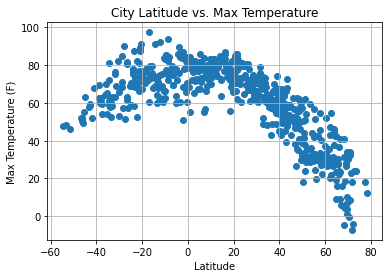

In [11]:
# no cities have humidity over 100%; dataframe is clean
x_val = city_data["Lat"]
# y_val1 = city_data["Max Temp"]
plt.scatter(x_val, max_temp)

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/lat_v_max_temp.png")
plt.show()

In [13]:
print("Analysis of temperature in compared to latitude shows a clear relationship between temperature and latitude. The closer to the eqator (latitude 0) a location is, the higher the maximum temperature.")

Analysis of temperature in compared to latitude shows a clear relationship between temperature and latitude. The closer to the eqator (latitude 0) a location is, the higher the maximum temperature.


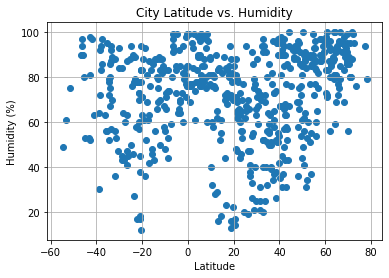

In [14]:
plt.scatter(x_val, humidity)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/lat_v_humidity.png")
plt.show()

In [17]:
print("There does not appear to be a strong correlation between latitude and humidity based on the data in the chart above. There appear to be slightly more cities with high humidity in higher nothern latitudes, but this may be due to there being a greater percentage of cities in the northern latitudes in the dataframe.")

There does not appear to be a strong correlation between latitude and humidity based on the data in the chart above. There appear to be slightly more cities with high humidity in higher nothern latitudes, but this may be due to there being a greater percentage of cities in the northern latitudes in the dataframe.


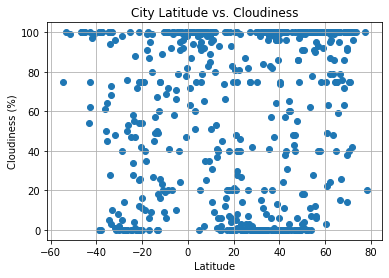

In [18]:
plt.scatter(x_val, cloudiness)

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/lat_v_cloudiness.png")
plt.show()

In [19]:
print("There is no obvious correlation between cloudiness and latitude.")

There is no obvious correlation between cloudiness and latitude.


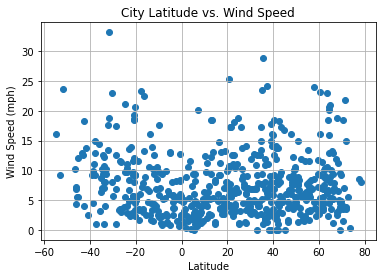

In [20]:
plt.scatter(x_val, wind_speed)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/lat_v_wind_speed.png")
plt.show()

In [21]:
print("Wind Speed appears to be fairly similar across all latitudes.")

Wind Speed appears to be fairly similar across all latitudes.


The r-value is: -0.8787339074746868


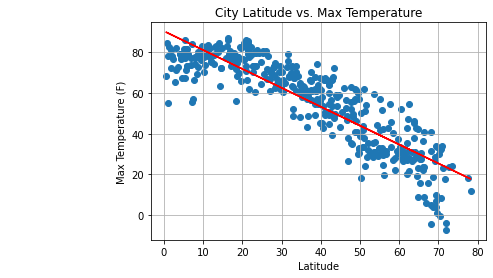

In [22]:
northern_city_data = city_data.loc[(city_data["Lat"]> 0)]
northern_x_val = northern_city_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_val, northern_city_data["Max Temp"])
regress_values = northern_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(northern_x_val, northern_city_data["Max Temp"])
plt.plot(northern_x_val, regress_values, "r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/northern_lat_v_max_temp.png")
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.573668184089367


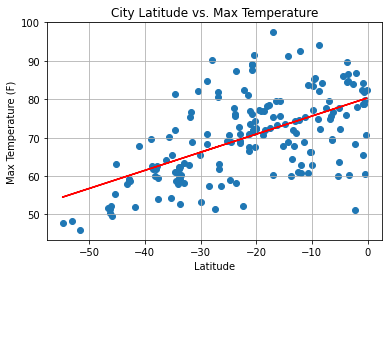

In [23]:
southern_city_data = city_data.loc[(city_data["Lat"]< 0)]
southern_x_val = southern_city_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_x_val, southern_city_data["Max Temp"])
regress_values = southern_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(southern_x_val, southern_city_data["Max Temp"])
plt.plot(southern_x_val, regress_values, "r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/southern_lat_v_max_temp.png")
print(f"The r-value is: {rvalue}")

plt.show()

In [24]:
print("There is a negative correlation between temperature and latitude in the northern hemisphere and a positive correlation in the southern hemisphere. Both relationships show that temperatures are higher in locations closer to the equator.")

There is a negative correlation between temperature and latitude in the northern hemisphere and a positive correlation in the southern hemisphere. Both relationships show that temperatures are higher in locations closer to the equator.


The r-value is: 0.2232924553495668


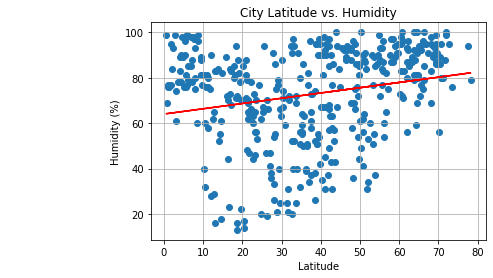

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_val, northern_city_data["Humidity"])
regress_values = northern_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(northern_x_val, northern_city_data["Humidity"])
plt.plot(northern_x_val, regress_values, "r-")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/northern_lat_v_humidity.png")
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.080599828413852


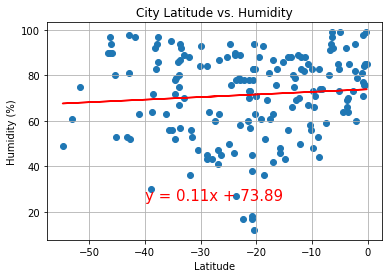

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_x_val, southern_city_data["Humidity"])
regress_values = southern_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(southern_x_val, southern_city_data["Humidity"])
plt.plot(southern_x_val, regress_values, "r-")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/southern_lat_v_humidity.png")
print(f"The r-value is: {rvalue}")

plt.show()

In [28]:
print("There appears to be very slight correlations between city latitude and humidity in the northern hemisphere, showing that there is an increase in humidity as distance from the equator increases.  However, the correlation of those two variables in the southern hemisphere is negligible")

There appears to be very slight correlations between city latitude and humidity in the northern hemisphere, showing that there is an increase in humidity as distance from the equator increases.  However, the correlation of those two variables in the southern hemisphere is negligible


The r-value is: 0.16828773851639564


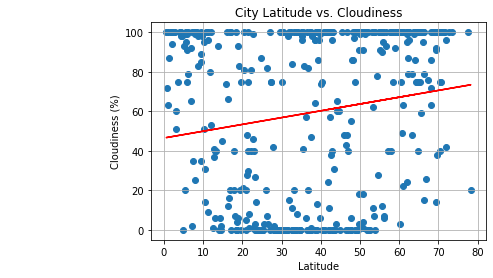

In [29]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_val, northern_city_data["Cloudiness"])
regress_values = northern_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_x_val, northern_city_data["Cloudiness"])
plt.plot(northern_x_val, regress_values, "r-")
plt.annotate(line_eq,(-40, 50),fontsize=15,color="red")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/northern_lat_v_cloudiness.png")
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.014021527466053878


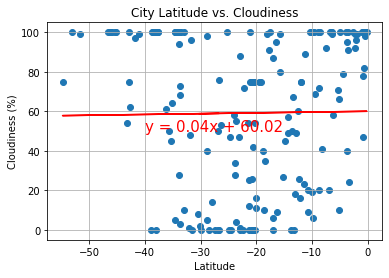

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_x_val, southern_city_data["Cloudiness"])
regress_values = southern_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_x_val, southern_city_data["Cloudiness"])
plt.plot(southern_x_val, regress_values, "r-")
plt.annotate(line_eq,(-40, 50),fontsize=15,color="red")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/southern_lat_v_cloudiness.png")
print(f"The r-value is: {rvalue}")

plt.show()

In [31]:
print("Linear regression shows relationships between cloudiness and distance from the equator, although the scatter plot shows no clear relationship between the two variables")

Linear regression shows relationships between cloudiness and distance from the equator, although the scatter plot shows no clear relationship between the two variables


The r-value is: 0.14131870212919143


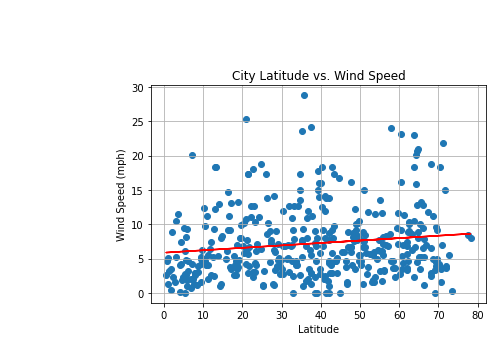

In [32]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_val, northern_city_data["Wind Speed"])
regress_values = northern_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_x_val, northern_city_data["Wind Speed"])
plt.plot(northern_x_val, regress_values, "r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/northern_lat_v_wind_speed.png")
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.3137462204398666


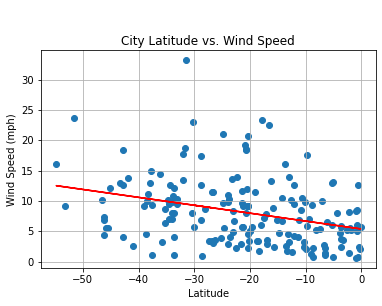

In [33]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_x_val, southern_city_data["Wind Speed"])
regress_values = southern_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_x_val, southern_city_data["Wind Speed"])
plt.plot(southern_x_val, regress_values, "r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/southern_lat_v_wind_speed.png")
print(f"The r-value is: {rvalue}")

plt.show()

In [34]:
print("Separate analysis of the northern and southern hemispheres shows wind speed increasing the further from the eqator a location is.")

Separate analysis of the northern and southern hemispheres shows wind speed increasing the further from the eqator a location is.
